In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_3488677/477056521.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# path = os.path.join("grad_results/mnist_monolithic_numtrain_64_contrastive/mnist/monolithic/seed_0/agent_0",
#                     "sharing_record.csv")
# df = pd.read_csv(path)
# df.head()

# path = "grad_new_results_divergence.csv"
path = "experiment_results/fl_divergence.csv"
df = pd.read_csv(path)
df.head()

,task_id,communication_round,time,algo,dataset,use_contrastive,avg_params,avg_params_stderr,avg_params_std
0,0,0,0,modular,mnist,True,5.351603e-09,0.000000,0.000000
1,0,0,0,monolithic,mnist,True,1.148144e-02,0.000268,0.000759
2,0,1,1,modular,mnist,True,1.834918e-09,0.000000,0.000000
3,0,1,1,monolithic,mnist,True,9.175830e-03,0.000363,0.001452
4,0,2,2,modular,mnist,True,0.000000e+00,0.000000,0.000000


In [3]:
def get_magma_colors(total_elements):
    start = 0.2
    stop = 0.8
    cm_subsection = np.linspace(start, stop, total_elements)
    return [matplotlib.cm.plasma(x) for x in cm_subsection]

In [4]:
# get unique algo, dataset, and use_contrastive
algo_list = df["algo"].unique()
dataset_list = df["dataset"].unique()
use_contrastive_list = df["use_contrastive"].unique()

algo_list, dataset_list, use_contrastive_list

(array(['modular', 'monolithic'], dtype=object),
 array(['mnist'], dtype=object),
 array([ True]))

In [5]:
len(algo_list) * len(dataset_list) * len(use_contrastive_list)

2

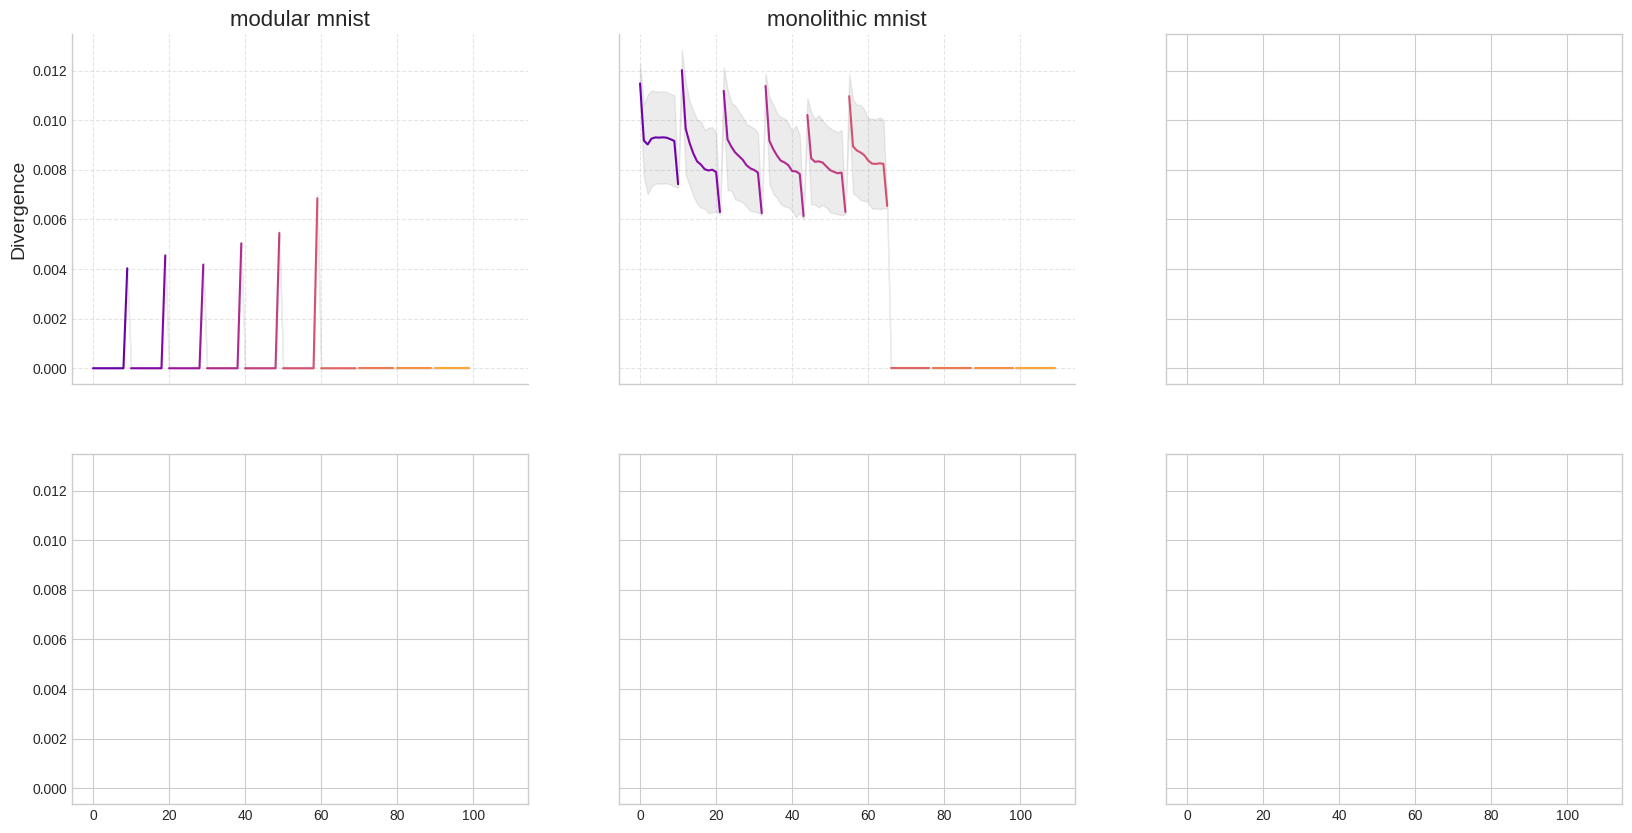

In [6]:

# take one combination of algo, dataset, and use_contrastive,
# and make df_one



# Create a plot with colored and labeled data points
# var = "avg_params_stderr"
var = "avg_params_std"
fig, axs = plt.subplots(figsize=(20, 10), nrows=2, ncols=3, sharex=True, sharey=True)
axs = axs.ravel()
plot_count = 0
for algo in algo_list:
        for dataset in dataset_list:
                for use_contrastive in use_contrastive_list: 
                        ax = axs[plot_count]
                        plot_count +=1
                        df_one = df[(df["algo"] == algo) & (df["dataset"] == dataset) & (df["use_contrastive"] == use_contrastive)]
                        num_colors = len(df_one['task_id'].unique())

                        colors = get_magma_colors(num_colors)

                        for i, (task_id, group) in enumerate(df_one.groupby('task_id')):
                                line = group.plot(x='time', y='avg_params', ax=ax,
                                label=i,
                                color=colors[i],
                        )

                        ax.fill_between(df_one['time'], df_one['avg_params'] - df_one[var], df_one['avg_params'] + df_one[var], 
                                        alpha=0.15, color='grey')
                        ax.get_legend().remove()
                        ax.set_xlabel("Time", fontsize=14)
                        ax.set_ylabel("Divergence", fontsize=14)
                        ax.set_title(f"{algo} {dataset}", fontsize=16)
                        ax.grid(True, which='major', linestyle='--', alpha=0.5)
                        ax.spines['top'].set_visible(False)
                        ax.spines['right'].set_visible(False)

plt.savefig("Figures/grad/divergence.pdf", bbox_inches='tight')

In [7]:
df_one

,task_id,communication_round,time,algo,dataset,use_contrastive,avg_params,avg_params_stderr,avg_params_std
1,0,0,0,monolithic,mnist,True,1.148144e-02,2.683541e-04,7.590201e-04
3,0,1,1,monolithic,mnist,True,9.175830e-03,3.630477e-04,1.452191e-03
5,0,2,2,monolithic,mnist,True,9.020006e-03,5.015222e-04,2.006089e-03
7,0,3,3,monolithic,mnist,True,9.254460e-03,4.830253e-04,1.932101e-03
9,0,4,4,monolithic,mnist,True,9.302197e-03,4.650774e-04,1.860310e-03
...,...,...,...,...,...,...,...,...,...
202,9,6,105,monolithic,mnist,True,2.649964e-10,2.448519e-11,9.794076e-11
204,9,7,106,monolithic,mnist,True,2.649964e-10,2.444829e-11,9.779316e-11
206,9,8,107,monolithic,mnist,True,2.649964e-10,2.448519e-11,9.794076e-11
208,9,9,108,monolithic,mnist,True,2.649964e-10,2.444829e-11,9.779316e-11
